# Required libraries
We need to run the cell below to import all the necessary libraries that we'll use.

In [2]:
# Importing required libraries
import numpy as np
from matplotlib import pyplot as plt

# Linear Regression

Linear regression is a method of finding parameters of a linear model to fit the provided input data.
The linear model is a straight line mathematically defined as:

$$
\tag{1}
\begin{equation}
y = wx + b 
\end{equation}
$$
Where:<br><br>
$y$ - target variable also called dependent variable, "output".<br>
$x$ - independent variable, "input".<br>
$w$ - input variable coefficient, learned parameter.<br>
$b$ - bias coefficient, learned parameter.<br>
<br>
Independent variable (x) doesn't have to be a single scalar value. Linear regression can model relationships between dependent variable (y) and multiple inputs as a sum of input values, each weighted by a coefficient and bias parameter. In this general case the equation for linear model would look like:

$$
\tag{2}
\begin{equation}
y = \displaystyle\sum_{i=0}^{n-1}w_ix_i + b
\end{equation}
$$
Where:<br><br>
$y$ - target variable also called dependent variable, "output".<br>
$n$ - number of independent variables (inputs).<br>
$x_i$ - $i$-th independent variable, "input".<br>
$w_i$ - $i$-th input variable coefficient, learned parameter.<br>
$b$ - bias coefficient, learned parameter. Single, scalar value.<br>
<br>
This could also be written using vectors for simplification:
$$
\tag{3}
\begin{equation}
y = \vec{w}^\intercal \vec{x} + b
\end{equation}
$$
Where:<br><br>
$y$ - target variable also called dependent variable, "output". Scalar<br>
$\vec{x}$ - vector of $n$ independent variables/inputs.<br>
$\vec{w}$ - vector of $n$ input variable coefficients, learned parameters. Note, the vector is transposed: $\vec{w}^\intercal$<br>
$b$ - bias coefficient, learned parameters. Single, scalar value.<br>
<br>
It is important to keep in mind we will never calculate just one, single value of target variable $y$. The value of dependent variable must be calculated multiple times, for each value of independent variable $x$ (or a set of values for multiple input variable**s** if we have more than one) we have in our dataset. We can present it as:

$$
\tag{4}
\begin{equation}
y^{(j)} = \displaystyle\sum_{i=0}^{n-1}w_i x_i^{(j)} + b
\end{equation}
$$
Where:<br><br>
$n$ - number of input variables $x$. Each data point in a dataset must have this many independent variables.<br>
$i$ - index of an input variable (or a corresponding parameter $w$):  $\ i\in[0, n]$<br>
$m$ - number of data points in the dataset. Each data point is a pair of values consisting of target variable value and set of values of input parameters, so the $j$-th data point would be represented as: $(y^{(j)},x_0^{(j)} ...\ x_n^{(j)})$.<br>
$j$ - index of a data point in a dataset: $\ j\in[0, m]$<br>
$y^{(j)}$ - value of target variable for $j$-th data sample in a dataset.<br>
$x_i^{(j)}$ - $i$-th input variable coefficient, for $j$-th data point in the dataset, learned parameter.<br>
$w_i$ - $i$-th input variable coefficient. Note this doesn't change between data samples $j$! Each data point uses the same set of coefficients $(w_0, w_n)$ for input variables $(x_0^{(j)} ...\ x_n^{(j)})$.<br>
$b$ - bias coefficient, learned parameter. Single, scalar value. Note it doesn't change between data samples.<br><br>

This could also be presented using matrices, but this will be elaboreted on later.

## Single variable linear function

### Implementation
Below code cell implements equations explained above for single input variable linear function.

In [3]:
# This cell implements class providing basic linear model with single variable.

class SingleInputLinearModel:
    """Basic linear model implementation assuming single input variable."""

    def __init__(self, w: float, b: float) -> None:
        """Method initiating model parameters.
        
        Arguments:
            w (float): input variable coefficient.
            b (float): bias variable parameter.
        """
        self.w = w
        self.b = b

    def y(self, x: float) -> float:
        """
        Returns target variable based on provided input value and model params.

        Arguments:
            x (float): input variable, single scalar value.
        
        Returns:
            float - calculated value of dependent variable. Scalar.
        """
        return x*self.w + self.b

In [4]:
# Linear model data preparation.

w = 2
b = 10

model = SingleInputLinearModel(w, b)

# Create a set of input values.
# NOTE: These are not different, separate input variables. These are different
#       values for the same independent variable.
# numpy method linspace() will yield us 5 values from the range of [0, 10].
x = np.linspace(0, 10, 5)

# This will calculate values of output variable for each input variable value
# in our single-input linear model
y = [model.y(x_j) for x_j in x]

### Visualisation
Below code visualises the results of simple linear model implementation from above.
The blue dots are actual data points we calculated in previous cell.
The red line is visualisation of a continuous linear function.

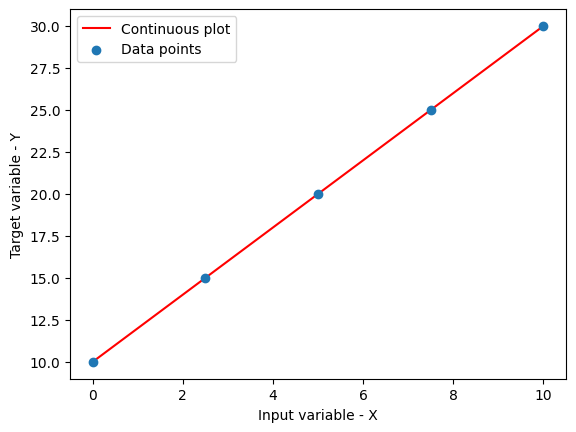

In [5]:
# Linear model visualisation on a scatter plot.
plt.plot(x, y, color="red", label="Continuous plot", zorder=0)
plt.scatter(x, y, label="Data points", zorder=1)
plt.ylabel("Target variable - Y")
plt.xlabel("Input variable - X")
plt.legend()
plt.show()

## Multivariate linear function

### Implementation
Now we'll do another implementation, this time for a case where our model can have any number of input variables.

In [8]:
# This cell implements class providing basic linear model that can have
# any number of input variables.

class MultivariateLinearModel:
    """Basic linear model implementation assuming single input variable."""

    def __init__(self, w_vector: np.ndarray, b: float) -> None:
        """Method initiating model parameters.
        
        Arguments:
            w_vector (np.ndarray): vector of input weight coefficients.
                This has to be numpy ndarray of shape (n,) where n in the number
                of independent (input) variables.
            b (float): bias variable parameter. This is single scalar value.
        """
        assert isinstance(w_vector, np.ndarray), "w_vector must be numpy array!"
        assert len(w_vector.shape) == 1 or \
               (len(w_vector.shape) == 2 and w_vector.shape[1] == 1), \
               "w_vector must be one dimensional vector!"
        self.w_vector = w_vector
        self.input_size = w_vector.shape[0]
        # If it's of shape (n, 1), rather than (n,) - reshape
        if len(w_vector.shape) == 2 and w_vector.shape[1] == 1:
            self.w_vector = self.w_vector.reshape((self.w_vector.size,))
        self.b = b

    def y(self, x_vector: np.ndarray) -> float:
        """
        Returns target variable based on provided input value and model params.

        Arguments:
            x_vector (np.ndarray): vector of input variable values. 
                Must be same size as self.w_vector.
        
        Returns:
            float - calculated value of dependent variable. Scalar.
        """
        # Input validation
        assert isinstance(x_vector, np.ndarray), "x_vector must be numpy array!"
        assert len(x_vector.shape) == 1 or \
               (len(x_vector.shape) == 2 and x_vector.shape[1] == 1), \
               "w_vector must be one dimensional vector!"
        # Reshape if needed
        if len(x_vector.shape) == 2 and x_vector.shape[1] == 1:
            x_v = x_vector.reshape((x_vector.size,))
        else:
            x_v = x_vector
        # Validate w and x are vectors of same length
        assert x_v.shape == self.w_vector.shape, \
            "x_vector must be same size as w_vector!"
        # Use numpy implementation of dot product to get target variable
        return np.dot(x_v, self.w_vector) + self.b

In [25]:
# Linear model data preparation.

# Create numpy array with two elements representing two-variable
# input coefficient vector
w = np.array([2, 4], dtype=float)
b = 10

model = MultivariateLinearModel(w, b)

print(f"Model takes input of size: {model.input_size}\n")

# Create a set of input values.
# NOTE: each row will have a pair of input variables

# numpy method column_stack() is used to stich two outputs of 
# linespace() method together, yielding us a set of inputs made of two
# variables
x = np.column_stack((np.linspace(0, 10, 5), np.linspace(5, 20, 5)))

print(f"Shape of x: {x.shape}")
print(f"Values of x:\n{x}\n")

# This will calculate values of output variable for each set of input 
# variables value
y = [model.y(x_j) for x_j in x]

# y is not a np array, so we can't use shape property
# we'll use len() function instead
print(f"Length of y: {len(y)}")
print(f"Values of y:\n{y}\n")

Model takes input of size: 2

Shape of x: (5, 2)
Values of x:
[[ 0.    5.  ]
 [ 2.5   8.75]
 [ 5.   12.5 ]
 [ 7.5  16.25]
 [10.   20.  ]]

Length of y: 5
Values of y:
[30.0, 50.0, 70.0, 90.0, 110.0]



### Visualisation
Because two-input-variable model would be difficult to show on 2D plot (although not impossible, since we could use color gradient), we'll use 3D to visualize the results.

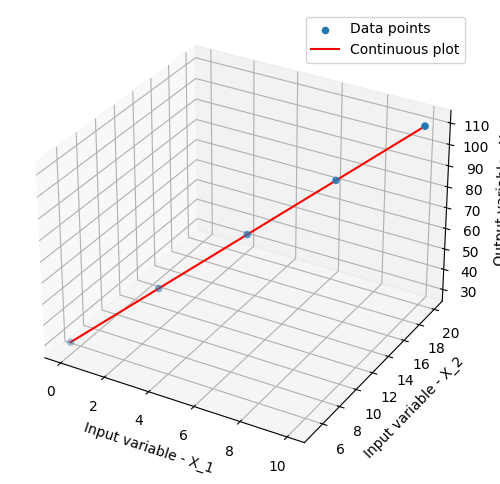

In [29]:
# Linear model visualisation on a scatter plot.

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
# We use index slicing e.g.: x[:,0] to take 0-th column in each row
ax.scatter(x[:,0], x[:,1], y, label="Data points")
ax.plot(x[:,0], x[:,1], y, color="red", label="Continuous plot", zorder=0)
ax.set_zlabel("Output variable - Y")
ax.set_xlabel("Input variable - X_1")
ax.set_ylabel("Input variable - X_2")
plt.legend()
plt.show()